## Assignment 2

Responding to recent news stories about how COVID has had a larger impact on underserved racial and socioeconomic groups, the New York City government has asked you to look at the correlation across zipcodes between Census demographics (income and race) and  COVID impacts (case, death, and positivity rates). Unfortunately, the data you have been given for this assignment is, like many real world datasets, very messy, so you will need to clean it with care. 


*Note: in this assignment, we artifically introduced errors into the data to help introduce concepts - this is not the original data provided by the New York government or by the Census Bureau. Please don't tweet angry things at the city government and get us fired :)*

*To make this assignment less frustrating for you, we have included sanity checks throughout to make sure you are on the right track. Please pay attention to these sanity checks! If you are not passing them, it is a sign something has gone wrong. In the real world, of course, you would not have these sanity checks, which is why data cleaning is hard and frustrating.*

#### A first challenge is even figuring out which columns you want. Read the codebook for Census data (you can find this in the data folder with the other data files)  to figure out which column provides the median income for each zipcode. Drop the rows with missing values (NA or None) in this column and change its name into "median_income". (5 points)

*Sanity check: you will have 30,824 rows in census data after this step.*

In [1]:
import pandas as pd

df = pd.read_csv("./content/messy_nhgis0004_ds244_20195_2019_zcta.csv")
df = df.dropna(subset=['ALW1E001'])
df.rename(columns={'ALW1E001': 'median_income'}, inplace=True)
df.shape

(30824, 82)

#### Use two of the columns in the Census data to compute the fraction of people who are white non-Hispanic in each zipcode. Add this column to the Census dataframe and call it "white_non_hispanic_frac". (5 points)
*Sanity check: the mean value of "white_non_hispanic" is around 0.764*

In [2]:
df['white_non_hispanic_frac'] = df['ALUKE003'] / df['ALUKE001']
df['white_non_hispanic_frac'].mean()

0.7641021559721349

Now we have to find keys to merge the Census dataset with the COVID dataset. Look for a key in the Census dataset which corresponds to a location grouping you can use to merge with the COVID data. Unfortunately, the closest thing you can find is ZCTA, and the only thing in the New York City COVID data is MODZCTA. Read this documentation, which explains the difference - https://github.com/nychealth/coronavirus-data#geography-zip-codes-and-zctas. Basically, multiple ZCTAs can map to a single MODZCTA. 

To address this problem, you need to modify the Census data by filtering for ZCTAs which appear in the MODZCTA table and merging the Census data with the MODZCTA table using pd.merge. Prior to doing this merge, be sure that any keys you expect to be be unique in the Census data (ie, different in every row) are really unique, as we discussed in class - drop duplicate rows if necessary!

#### After doing the merge, you will be left with a dataframe which has multiple rows for some MODZCTAs; combine rows which correspond to the same MODZCTA into a single row. Every time you combine multiple rows, combine the values for white_non_hispanic and median_income by taking the mean. You can do this using the pandas groupby and agg commands. (20 points)

*Sanity check: If you did this step correctly, you should be left with a Census table which contains 177 rows.*

In [3]:
df_conv = pd.read_csv("./content/messy_ZCTA-to-MODZCTA.csv")
df_conv.head()

,ZCTA,MODZCTA
0,10001,M10001
1,10002,M10002
2,10003,M10003
3,10004,M10004
4,10005,M10005


In [12]:
df_conv.MODZCTA.nunique()

178

In [4]:
df = df[df.ZCTA5A.isin(df_conv.ZCTA.unique())]
df.shape

(185, 83)

In [5]:
df = df.merge(df_conv, how='left', left_on='ZCTA5A', right_on='ZCTA')
df.head()

,YEAR,STUSAB,REGIONA,DIVISIONA,STATEA,COUNTYA,COUSUBA,PLACEA,TRACTA,BLKGRPA,...,ALUKM016,ALUKM017,ALUKM018,ALUKM019,ALUKM020,ALUKM021,ALW1M001,white_non_hispanic_frac,ZCTA,MODZCTA
0,2015-2019,US,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,22,22,271,298,37,295,8971.0,0.545798,10001,M10001
1,2015-2019,US,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,151,28,1139,621,125,631,2384.0,0.220143,10002,M10002
2,2015-2019,US,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,10,28,492,72,37,76,10235.0,0.691331,10003,M10003
3,2015-2019,US,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,38,12,12,30,2,30,49426.0,0.592804,10004,M10004
4,2015-2019,US,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,17,17,260,46,3,46,15832.0,0.716699,10005,M10005


In [6]:
df_grouped = df.groupby("MODZCTA").agg({'white_non_hispanic_frac': 'mean', 'median_income': 'mean'})
df_grouped.shape

(177, 2)

In [7]:
df_grouped.reset_index(inplace=True)

#### Now we have a Census data table we can merge with the NYC COVID data. Merge the two datasets using MODZCTA as the merge key. As we discussed in class, you may need to write some extra code to make sure that the keys in the two different tables are in the exact same format (for example, if one is an integer, the other should be an integer as well, or the merge will not work) (5 points) ####

In [18]:
df_covid = pd.read_csv("./content/messy_covid_data.csv")
df_covid.shape

(177, 13)

In [19]:
(df_grouped.MODZCTA.dtype, df_covid.MODIFIED_ZCTA.dtype)

(dtype('O'), dtype('int64'))

In [20]:
df_grouped['MODZCTA'] = df_grouped.MODZCTA.str[1:].astype('int64')

In [21]:
df_merged = df_grouped.merge(df_covid, left_on='MODZCTA', right_on='MODIFIED_ZCTA')
df_merged.shape

(177, 16)

#### Now compute the correlations across MODZCTAs between the white non-Hispanic fraction, the median income, and the COVID case and death rates and percent positive. If you want to compute correlations between all five of these variables at once, you can use the pandas method "corr".  (5 points) #### 

In [ ]:
corr_columns = [
    "white_non_hispanic_frac",
    "median_income",
    "COVID_CASE_RATE",
    "COVID_DEATH_RATE",
    "PERCENT_POSITIVE"
]

df_merged[corr_columns].corr().round(2)

,white_non_hispanic_frac,median_income,COVID_CASE_RATE,COVID_DEATH_RATE,PERCENT_POSITIVE
white_non_hispanic_frac,1.00,0.68,0.27,-0.47,-0.19
median_income,0.68,1.00,0.29,-0.63,-0.35
COVID_CASE_RATE,0.27,0.29,1.00,-0.19,0.58
COVID_DEATH_RATE,-0.47,-0.63,-0.19,1.00,0.39
PERCENT_POSITIVE,-0.19,-0.35,0.58,0.39,1.00


#### Are the correlations in the directions you expect? Write a couple sentences interpreting the direction of the correlations. (5 points) #### 

Most of them are. For example, we see that `median_income` and `white_non_hispanic_frac` are rather strongly positively correlated; i.e. samples with a higher median income generally also have higher fraction of white, non-hispanic inhabitants. This is in line with the type of socio-economnic patterns one would expect to see in American neighborhoods. Furthermore, we see that `median_income` is negatively correlated with `COVID_DEATH_RATE`, i.e. a higher median income is associated with a lower Covid death rate. Seeing that individuals with higher incomes often have access to better healthcare, this is not surprising. The only result that may be surprising is the fact that `median_income` and `COVID_CASE_RATE` are positively correlated: one would not expect neighborhoods with a higher median income to also be the place where the Covid case rate is higher, certainly not when the death rate is lower.    

#### It turns out that several of these five columns have bad values that we still haven't filtered out. Use the pandas method "describe" to find values which are implausibly large or small. Print out the results here and explain your interpretation. (10 points) ####

In [ ]:
df_merged.COVID_CASE_RATE.describe()

count       177.000000
mean     -36834.250395
std      210166.276084
min     -999999.000000
25%        6317.060000
50%        8704.640000
75%       10619.150000
max       16830.670000
Name: COVID_CASE_RATE, dtype: float64

In [ ]:
df_merged.COVID_DEATH_RATE.describe()

count    177.000000
mean     313.450395
std      145.522976
min        0.000000
25%      225.010000
50%      310.900000
75%      388.220000
max      944.530000
Name: COVID_DEATH_RATE, dtype: float64

In [ ]:
df_merged.PERCENT_POSITIVE.describe()

count    177.000000
mean      12.769492
std        4.880957
min        0.000000
25%        8.840000
50%       14.150000
75%       16.260000
max       20.400000
Name: PERCENT_POSITIVE, dtype: float64

While the values for `PERCENT_POSITIVE` and `COVID_DEATH_RATE` may be plausible, there definintely appears to be an anomaly in the `COVID_CASE_RATE` field: the minimum value here is -999999. Because of this, the mean value of this column in negative too, which is not possible. Therefore, we will remove the rows where this column has a value under 0.  

#### Recompute these correlations after removing the rows with these bad values (a tip: look at the abnormal values in covid data). How many rows did you remove? (10 points) ####

In [ ]:
df_clean = df_merged[df_merged.COVID_CASE_RATE >= 0]
df_clean.shape

(169, 16)

We removed 8 rows. The correlations now are as follows.

In [ ]:
df_clean[corr_columns].corr().round(2)

,white_non_hispanic_frac,median_income,COVID_CASE_RATE,COVID_DEATH_RATE,PERCENT_POSITIVE
white_non_hispanic_frac,1.00,0.65,-0.28,-0.48,-0.44
median_income,0.65,1.00,-0.55,-0.65,-0.65
COVID_CASE_RATE,-0.28,-0.55,1.00,0.61,0.92
COVID_DEATH_RATE,-0.48,-0.65,0.61,1.00,0.65
PERCENT_POSITIVE,-0.44,-0.65,0.92,0.65,1.00


*If you're doing it correctly, you may have the correlation between median_income and COVID_CASE_RATE as around -0.54766, rather than the positive value you got before (0.286642). This is why it's important to be careful cleaning your data - if you get unlucky, a couple bad datapoints can totally change your conclusions.*

Another important lesson here is to use statistical measures which are robust (ie, won't totally break) if you have a few bad datapoints. Conventional correlation (Pearson correlation) can be heavily influenced by outliers, which is why it breaks here. Spearman correlation is less influenced by outliers, for reasons we'll discuss. Compute Spearman correlation using the messy data, without filtering out the bad rows; you will see that it is less sensitive to outliers.

#### Another way to make your analyses robust is to run them several different ways: for example, compute both Spearman AND pearson correlation. This is a good idea in general. (5 points) ####

In [ ]:
df_merged[corr_columns].corr(method='spearman').round(2)

,white_non_hispanic_frac,median_income,COVID_CASE_RATE,COVID_DEATH_RATE,PERCENT_POSITIVE
white_non_hispanic_frac,1.00,0.72,-0.18,-0.53,-0.23
median_income,0.72,1.00,-0.31,-0.62,-0.30
COVID_CASE_RATE,-0.18,-0.31,1.00,0.51,0.95
COVID_DEATH_RATE,-0.53,-0.62,0.51,1.00,0.49
PERCENT_POSITIVE,-0.23,-0.30,0.95,0.49,1.00


#### It's also a good idea to plot the data. Use seaborn's pairplot function to plot all 5 variables, making it obvious that something weird is happening with the original values. (5 points) ####

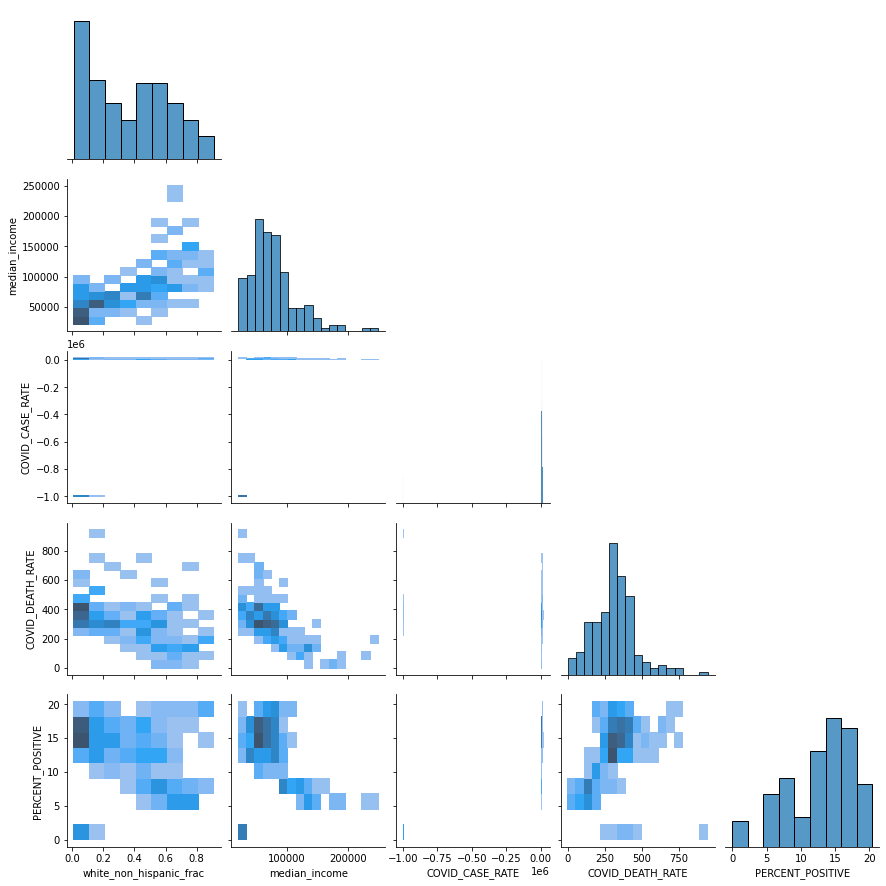

In [ ]:
import seaborn as sns

sns.pairplot(df_merged[corr_columns], kind='hist', corner=True)

#### Using the same merged dataframe you just used, re-calculate the Spearman correlation with same five variables (white non-Hispanic fraction, median income, COVID_CASE_RATE, COVID_DEATH_RATE, and PERCENT_POSITIVE). But this time, use the NEIGHBORHOOD_NAME as a location grouping rather than MODZCTA, as described below (25 points):

1. Split up neighborhoods using the "/" character. For example, "Chinatown" is one neighborhood. And MODZCTAs with the “Chinatown/Lower East Side” label should go into both the Chinatown row and the Lower East Side row.
2. Use the mean of all rate/percentage values of a certain neighborhood as its variable. For example, if "Roosevelt Island" has two MODZCTAs "Roosevelt Island/Lenox Hill" and "Roosevelt Island/Midtown East" and these two areas have PERCENT_POSITIVE as 12.00 and 8.00 respectively, then we assume Roosevelt Island has PERCENT_POSITIVE as (12+8)/2=10.00. Similarly, if the median income in "Roosevelt Island/Lenox Hill" is 1000, and the median income in "Roosevelt Island/Midtown East" is 2200, then we assume that Roosevelt Island has a median income of (2200 + 1000) / 2 = 1600. 
3. Remove all rows with abnormal COVID data prior to performing this analysis. 

What do you find?

*Sanity check 1: You should find 225 unique neighborhoods before removing rows with abnormal values*

*Sanity check 2: The mean of median_income in "Financial District" is around $164000 (and you may drop one zipcode row of Financial District due to the lack of data).*

In [ ]:
df_merged.NEIGHBORHOOD_NAME

0                    Chelsea/NoMad/West Chelsea
1                     Chinatown/Lower East Side
2      East Village /Gramercy/Greenwich Village
3                            Financial District
4                            Financial District
                         ...                   
172                     Edgemere / Far Rockaway
173                           Arverne /Edgemere
174                      Arverne /Broad Channel
175         Belle Harbor-Neponsit/Rockaway Park
176                                Breezy Point
Name: NEIGHBORHOOD_NAME, Length: 177, dtype: object

In [ ]:
df_merged['NEIGHBORHOOD_NAME'] = df_merged.NEIGHBORHOOD_NAME.str.replace(" ", "")
df_merged['NEIGHBORHOOD_NAME'] = df_merged.NEIGHBORHOOD_NAME.str.split("/")
df_merged.head()

,MODZCTA,white_non_hispanic_frac,median_income,MODIFIED_ZCTA,NEIGHBORHOOD_NAME,BOROUGH_GROUP,label,lat,lon,COVID_CASE_COUNT,COVID_CASE_RATE,POP_DENOMINATOR,COVID_DEATH_COUNT,COVID_DEATH_RATE,PERCENT_POSITIVE,TOTAL_COVID_TESTS
0,10001,0.545798,92840.0,10001,"[Chelsea, NoMad, WestChelsea]",Manhattan,"10001, 10118",40.750693,-73.997137,1619,5863.16,27613.09,35,126.75,7.52,22248
1,10002,0.220143,36982.0,10002,"[Chinatown, LowerEastSide]",Manhattan,10002,40.715781,-73.986176,6107,8107.78,75322.71,286,379.70,12.36,51259
2,10003,0.691331,118161.0,10003,"[EastVillage, Gramercy, GreenwichVillage]",Manhattan,10003,40.731825,-73.989164,2928,5424.45,53977.81,49,90.78,6.95,42943
3,10004,0.592804,190223.0,10004,[FinancialDistrict],Manhattan,10004,40.703675,-74.013106,251,8445.16,2972.12,2,67.29,6.66,3816
4,10005,0.716699,189702.0,10005,[FinancialDistrict],Manhattan,10005,40.706092,-74.008861,428,4887.39,8757.23,0,0.00,6.51,6588


In [ ]:
all_neigh = []

for val in df_merged.NEIGHBORHOOD_NAME:
    all_neigh += val

len(set(all_neigh))

225

In [ ]:
df_explode = df_merged.explode(column='NEIGHBORHOOD_NAME')
df_explode.shape

(343, 16)

In [ ]:
df_neighb_grouped = df_explode.groupby('NEIGHBORHOOD_NAME')[corr_columns].mean().reset_index()
df_neighb_grouped.head()

,NEIGHBORHOOD_NAME,white_non_hispanic_frac,median_income,COVID_CASE_RATE,COVID_DEATH_RATE,PERCENT_POSITIVE
0,Airport,0.051432,59135.5,11257.845,521.905,15.895
1,Allerton,0.096393,52385.5,10197.710,529.710,15.975
2,AlphabetCity,0.515654,63717.0,6572.050,213.470,9.460
3,Annadale,0.811832,97407.0,12757.820,212.930,18.680
4,Arrochar,0.601414,79742.0,13192.960,329.010,19.560


In [ ]:
# Sanity check
df_neighb_grouped[df_neighb_grouped.NEIGHBORHOOD_NAME == "FinancialDistrict"].median_income

74    163667.75
Name: median_income, dtype: float64

In [ ]:
df_neighb_grouped[df_neighb_grouped.COVID_CASE_RATE >= 0].corr(method='spearman').round(2)

,white_non_hispanic_frac,median_income,COVID_CASE_RATE,COVID_DEATH_RATE,PERCENT_POSITIVE
white_non_hispanic_frac,1.00,0.68,-0.16,-0.45,-0.18
median_income,0.68,1.00,-0.43,-0.61,-0.42
COVID_CASE_RATE,-0.16,-0.43,1.00,0.59,0.95
COVID_DEATH_RATE,-0.45,-0.61,0.59,1.00,0.55
PERCENT_POSITIVE,-0.18,-0.42,0.95,0.55,1.00


In [ ]:
# Absolute difference in correlation
abs(df_neighb_grouped[df_neighb_grouped.COVID_CASE_RATE >= 0].corr(method='spearman').round(2) - df_merged[corr_columns].corr(method='spearman').round(2))

,white_non_hispanic_frac,median_income,COVID_CASE_RATE,COVID_DEATH_RATE,PERCENT_POSITIVE
white_non_hispanic_frac,0.00,0.04,0.02,0.08,0.05
median_income,0.04,0.00,0.12,0.01,0.12
COVID_CASE_RATE,0.02,0.12,0.00,0.08,0.00
COVID_DEATH_RATE,0.08,0.01,0.08,0.00,0.06
PERCENT_POSITIVE,0.05,0.12,0.00,0.06,0.00


When grouping the data by neighborhood, rather than by ZIP code, we find that the results are relatively similar in general. The biggest different in correlation is 0.12, which is found in the correlation between median income and Covid case rate, and median income and `PERCENT_POSITIVE`. The correlations in when looking at neighborhoods are more strongly negative than when looking at ZIP codes. I.e., we can conclude that neighborhoods with a high income lead to lower case rates more strongly than ZIP codes with a high income do. This is likely an artifact related to the fact that we averaged the median incomes for certain neighborhoods. This can also be recognized when looking at the max value of `median_income` for both cases: this is higher when looking at ZIP codes.  

In [ ]:
(df_neighb_grouped.median_income.max(), df_merged.median_income.max())

(216380.5, 250001.0)